### Importamos librerías

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn import tree

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.externals.joblib import dump, load

import optuna
import os
from collections import Counter
import plotly.graph_objects as go

In [28]:
df = pd.read_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data','cerebrovascular.csv'))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Análisis

In [29]:
Counter(df['stroke'])

Counter({0: 42617, 1: 783})

In [30]:
df.drop('id', axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [32]:
df.drop(['hypertension', 'heart_disease', 'stroke'], axis=1).describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,41938.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.770020
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.200000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.900000
max,82.000000,291.050000,97.600000


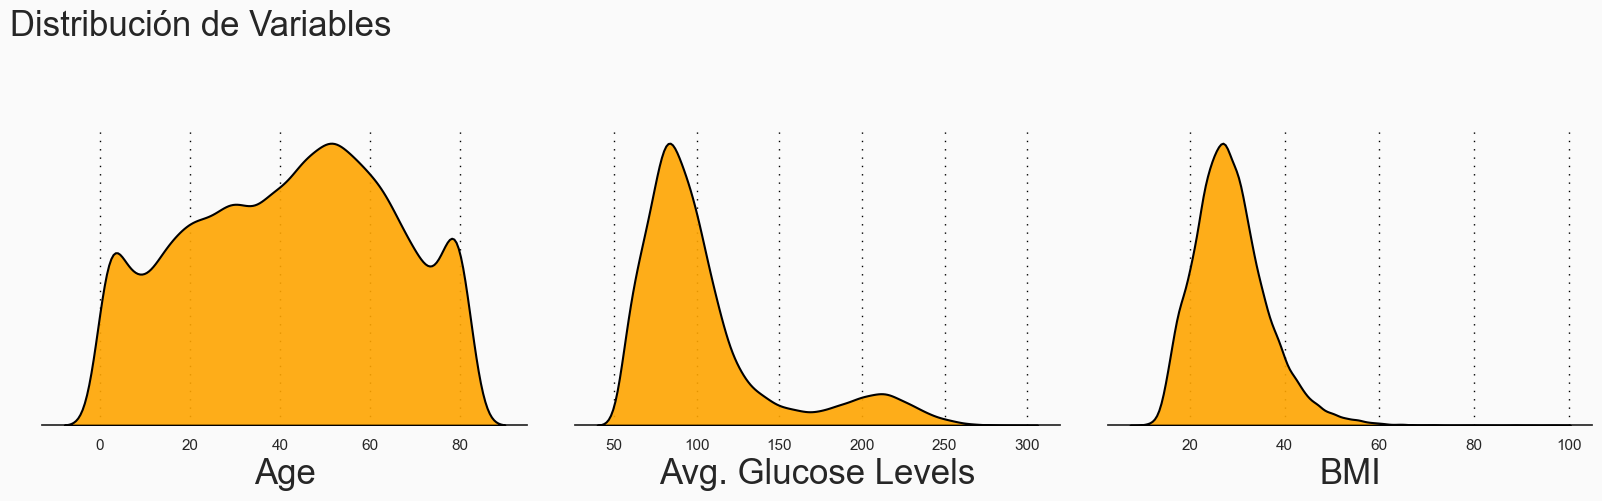

In [33]:
fig = plt.figure(figsize=(20, 20), facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
conts = ['age','avg_glucose_level','bmi']
background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='orange', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='black', linestyle=':', dashes=(1,5))
        plot += 1
        
ax0.set_xlabel('Age', fontsize=25)
ax1.set_xlabel('Avg. Glucose Levels', fontsize=25)
ax2.set_xlabel('BMI', fontsize=25)

ax0.text(-20, 0.022, 'Distribución de Variables', fontsize=25)

plt.show()
fig.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', 'image', "var_ent.jpg"))

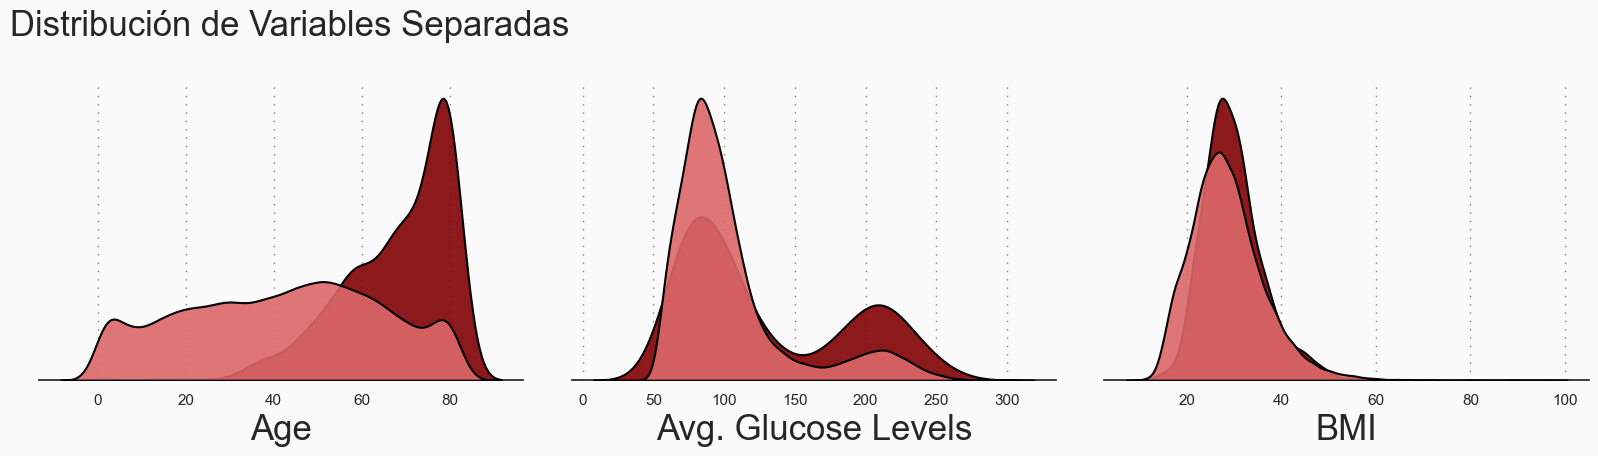

In [34]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]
conts = ['age','avg_glucose_level','bmi']
background_color = "#fafafa"

fig = plt.figure(figsize=(20, 20),facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#800002', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#db6769', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

ax0.set_xlabel('Age', fontsize=25)
ax1.set_xlabel('Avg. Glucose Levels', fontsize=25)
ax2.set_xlabel('BMI', fontsize=25)

ax0.text(-20, 0.056, 'Distribución de Variables Separadas', fontsize=25)

plt.show()
fig.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "var_sep.jpg"))

In [35]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['age'], name='Age', marker_color = 'indianred'))
fig.add_trace(go.Box(y=df['avg_glucose_level'], name = 'Glucose', marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df['bmi'], name = 'BMI', marker_color = 'blue'))
fig.show()

### Preprocesamiento

In [36]:
mean_age = np.mean(df['age'])
std_dev_age = np.std(df['age'])

# More than 3 standard deviations from the mean an outlier
threshold = 3

#create the condition to find outliers
outliers_age = df['age'][np.abs(df['age'] - mean_age) > threshold * std_dev_age]
print(outliers_age)

Series([], Name: age, dtype: float64)


In [37]:
mean_glucose = np.mean(df['avg_glucose_level'])
std_dev_glucose = np.std(df['avg_glucose_level'])

# More than 3 standard deviations from the mean an outlier
threshold = 3

# Create the condition to find outliers
outliers_glucose = df['avg_glucose_level'][np.abs(df['avg_glucose_level'] - mean_glucose) > threshold * std_dev_glucose]
print(outliers_glucose)

# Delete outliers from dataset
df.drop(outliers_glucose.index, inplace = True)

7        243.53
54       242.30
77       234.58
78       235.85
83       243.50
          ...  
43228    271.01
43279    242.61
43283    258.24
43287    238.23
43358    248.93
Name: avg_glucose_level, Length: 645, dtype: float64


In [38]:
condition = df[(df['bmi'] > 60)].index
df.drop(condition, inplace=True)

In [39]:
df[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,42670.000000,42670.000000,41269.000000
mean,41.930644,102.331165,28.453442
std,22.514106,39.738885,7.546610
min,0.080000,55.000000,10.100000
25%,24.000000,77.340000,23.200000
50%,43.000000,91.120000,27.700000
75%,60.000000,110.650000,32.700000
max,82.000000,233.810000,60.000000


In [40]:
print(df.gender.unique())
print(df.ever_married.unique())
print(df.work_type.unique())
print(df.Residence_type.unique())
print(df.smoking_status.unique())

['Male' 'Female' 'Other']
['No' 'Yes']
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
['Rural' 'Urban']
[nan 'never smoked' 'formerly smoked' 'smokes']


### Transformación

In [41]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(int)
df['ever_married'] = df['ever_married'].replace({'No':0,'Yes':1}).astype(int)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(int)
df.smoking_status = df.smoking_status.fillna('nan')

In [42]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
binary_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']
categorical_features = ['work_type', 'smoking_status']
target = 'stroke'

X_cat_features = df[categorical_features]
print("Categorical features: ", list(X_cat_features.columns)) # + co_loader_columns)

oHec = OneHotEncoder()
X_enc = oHec.fit_transform(X_cat_features)
X_cat_features = pd.DataFrame(X_enc.toarray(), columns=oHec.get_feature_names_out())

print("Numerical features: ", numerical_features)
scaler = StandardScaler()
X_num_features = scaler.fit_transform(df[numerical_features])
X_num_features = pd.DataFrame(X_num_features, columns=numerical_features)

X_bin_features = df[binary_features]

# Concat (columns concat) X_cat and X_num     
X = pd.concat([X_num_features.reset_index(drop=True), X_bin_features.reset_index(drop=True), X_cat_features.reset_index(drop=True)], axis=1)     
y = df[target]     
print("Target (dependent) variable: ", target)

Categorical features:  ['work_type', 'smoking_status']
Numerical features:  ['age', 'avg_glucose_level', 'bmi']
Target (dependent) variable:  stroke


Guardamos objetos de OneHotEncoder y StandardScaler

In [43]:
with open(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'scaler'), 'wb') as f: 
    pickle.dump(scaler, f)

with open(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'encoder'), 'wb') as f: 
    pickle.dump(oHec, f)

In [44]:
X.isnull().sum()

age                                  0
avg_glucose_level                    0
bmi                               1401
gender                               0
hypertension                         0
heart_disease                        0
ever_married                         0
Residence_type                       0
work_type_Govt_job                   0
work_type_Never_worked               0
work_type_Private                    0
work_type_Self-employed              0
work_type_children                   0
smoking_status_formerly smoked       0
smoking_status_nan                   0
smoking_status_never smoked          0
smoking_status_smokes                0
dtype: int64

Imputamos valores nulos

In [45]:
imputer = KNNImputer()
imputer.fit(X)
X = pd.DataFrame(imputer.transform(X), columns=X.columns)

In [46]:
X.isnull().sum()

age                               0
avg_glucose_level                 0
bmi                               0
gender                            0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_nan                0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

### Selección de características (No integrado)

Wrapper

In [28]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
rfe = RFE(estimator=model_tree)
rfe_model = rfe.fit(X, y)
print("Número de características seleccionadas: ", rfe_model.n_features_)
print("Atributos seleccionados: ", rfe_model.support_)
print("Ranking de características: ", rfe_model.ranking_)

Número de características seleccionadas:  8
Atributos seleccionados:  [ True  True  True  True False False False  True False False  True False
 False  True False  True False]
Ranking de características:  [ 1  1  1  1  2  4  6  1  8 10  1  3  9  1  7  1  5]


In [29]:
imp_features = np.sort(rfe.get_support(1))

In [31]:
X = X[X.columns[imp_features]]

### División entre entrenamiento y test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### Modelos de clasificación

In [169]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVC',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [170]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Balanced Accuracy Score: {:.2f} %',balanced_accuracy_score(y_test,y_pred))
    print('')
    print('Accuracy Score: {:.2f} %',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(balanced_accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[8385    0]
 [ 149    0]]
Balanced Accuracy Score: {:.2f} % 0.5

Accuracy Score: {:.2f} % 0.9825404265291774

K-Fold Validation Mean Accuracy: 98.25 %

Standard Deviation: 0.01 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

Logistic Regression :
[[8385    0]
 [ 149    0]]
Balanced Accuracy Score: {:.2f} % 0.5

Accuracy Score: {:.2f} % 0.9825404265291774

K-Fold Validation Mean Accuracy: 98.25 %

Standard Deviation: 0.01 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

SVC :
[[8385    0]
 [ 149    0]]
Balanced Accuracy Score: {:.2f} % 0.5

Accuracy Score: {:.2f} % 0.9825404265291774

K-Fold Validation Mean Accuracy: 98.25 %

Standard Deviation: 0.01 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

KNeigbors :
[[8379    6]
 [ 149    0]]
Balanced Accuracy Score

In [171]:
df2 = pd.DataFrame(lst_1, columns=['Model','Balanced Accuracy','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by='ROC_AUC',inplace=True,ascending=False)
df2.to_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'data', 'comparaciones.csv'), index=False)
df2

,Model,Balanced Accuracy,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
4,GaussianNB,66.998355,38.387626,37.696104,4.259946,0.669984,0.026681,0.966443,0.051929
5,DecisionTree,50.940078,96.215139,96.385062,0.262197,0.509401,0.032258,0.040268,0.035821
0,XGBClassifier,50.000000,98.254043,98.254045,0.014102,0.500000,0.000000,0.000000,0.000000
1,Logistic Regression,50.000000,98.254043,98.254045,0.014102,0.500000,0.000000,0.000000,0.000000
2,SVC,50.000000,98.254043,98.254045,0.014102,0.500000,0.000000,0.000000,0.000000
7,AdaBoostClassifier,50.000000,98.254043,98.254045,0.014102,0.500000,0.000000,0.000000,0.000000
6,RandomForest,49.994037,98.242325,98.233538,0.026240,0.499940,0.000000,0.000000,0.000000
3,KNeigbors,49.964222,98.183736,98.210100,0.024373,0.499642,0.000000,0.000000,0.000000


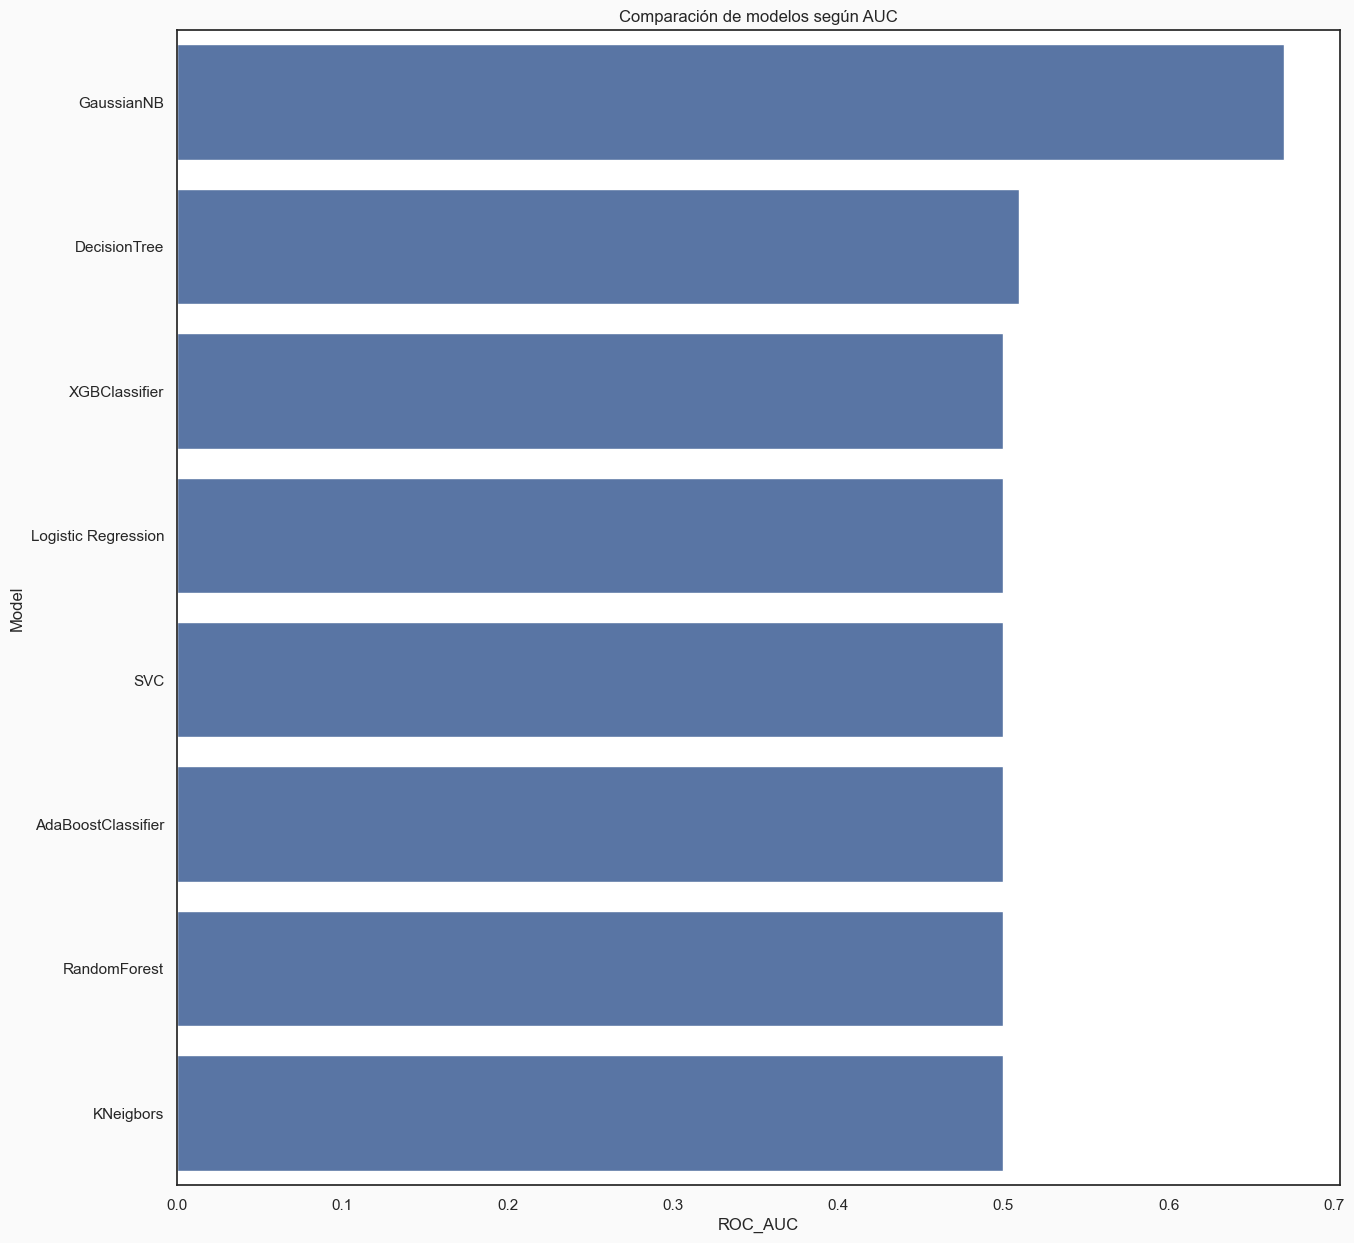

In [175]:
fig = plt.figure(figsize=(15, 15), facecolor=background_color)
sns.barplot(x='ROC_AUC', y='Model', data=df2, color='b')
plt.title('Comparación de modelos según AUC');
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "comp.jpg"))

### Optuna

XGBClassifier

In [201]:
def objective(trial):

    params = {
        'booster' : trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'eta' : trial.suggest_float('eta', 0, 1),
        'max_depth' : trial.suggest_int('max_depth', 1, 300),
        'alpha' : trial.suggest_float('leaf_size', 0, 0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 0.1),
    }
    model = XGBClassifier(**params)
    
    model.fit(X_train, y_train)

    y_pred = np.round(model.predict(X_test))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=500)

[I 2023-08-05 17:50:47,586] A new study created in memory with name: no-name-f4e60f72-7024-4245-9508-198aeb9fc280


[I 2023-08-05 17:50:57,744] Trial 2 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'eta': 0.060130883314979955, 'max_depth': 54, 'leaf_size': 0.0861408276341194, 'reg_lambda': 0.0325083371042501}. Best is trial 2 with value: 0.5.
[I 2023-08-05 17:50:58,024] Trial 6 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'eta': 0.5743663780286148, 'max_depth': 112, 'leaf_size': 0.027297676845936515, 'reg_lambda': 0.08415370788102665}. Best is trial 2 with value: 0.5.
[I 2023-08-05 17:50:58,108] Trial 0 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'eta': 0.2894638785264677, 'max_depth': 105, 'leaf_size': 0.06405867891212245, 'reg_lambda': 0.03426503392961523}. Best is trial 2 with value: 0.5.
[I 2023-08-05 17:50:58,154] Trial 7 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'eta': 0.11080640581338752, 'max_depth': 134, 'leaf_size': 0.0906280141778286, 'reg_lambda': 0.0734606293699038}. Best is trial 2 with value: 0.5.
[I 20

[I 2023-08-05 18:03:54,035] Trial 32 finished with value: 0.505161021799074 and parameters: {'booster': 'dart', 'eta': 0.8370621397707463, 'max_depth': 243, 'leaf_size': 0.01163496859310151, 'reg_lambda': 0.02007016745894977}. Best is trial 17 with value: 0.5116339100262933.


In [ ]:
parameters = study.best_params
roc = round(study.best_value, 3)
precision = round(study.best_trial.user_attrs['precision'], 3)
recall = round(study.best_trial.user_attrs['recall'], 3)
f1 = round(study.best_trial.user_attrs['f1'], 3)

print(f'\033[1mXGBClassifier Model\033[0m\nBest parameters: {parameters}\nBest ROC AUC score: {roc}\nPrecision score: {precision}\nRecall score: {recall}\nF1 score: {f1}')

XGBClassifier Model
Best parameters: {'booster': 'gbtree', 'eta': 0.9957423589060678, 'max_depth': 283, 'leaf_size': 0.0004010438482451653, 'reg_lambda': 0.03533431523250564}
Best ROC AUC score: 0.524
Precision score: 0.195
Recall score: 0.051
F1 score: 0.081


[23:57:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "leaf_size" } are not used.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8385
           1       0.05      0.01      0.02       149

    accuracy                           0.98      8534
   macro avg       0.52      0.50      0.51      8534
weighted avg       0.97      0.98      0.97      8534

ROC AUC score: 0.7180079480376031
Balanced Accuracy Score:  0.5045050885850012


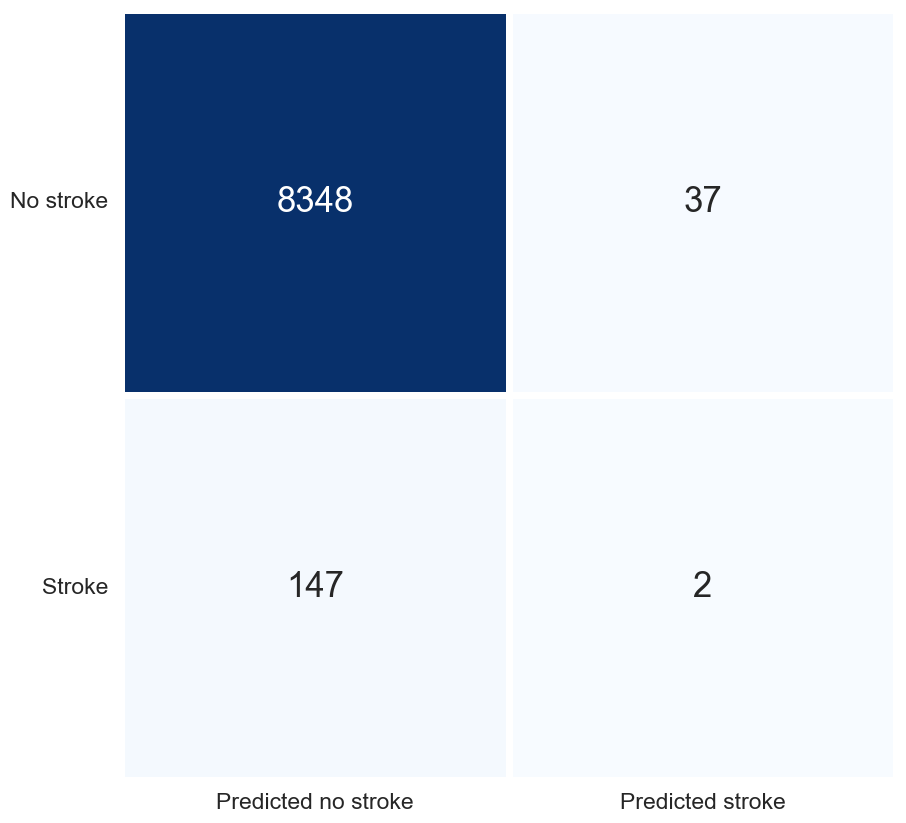

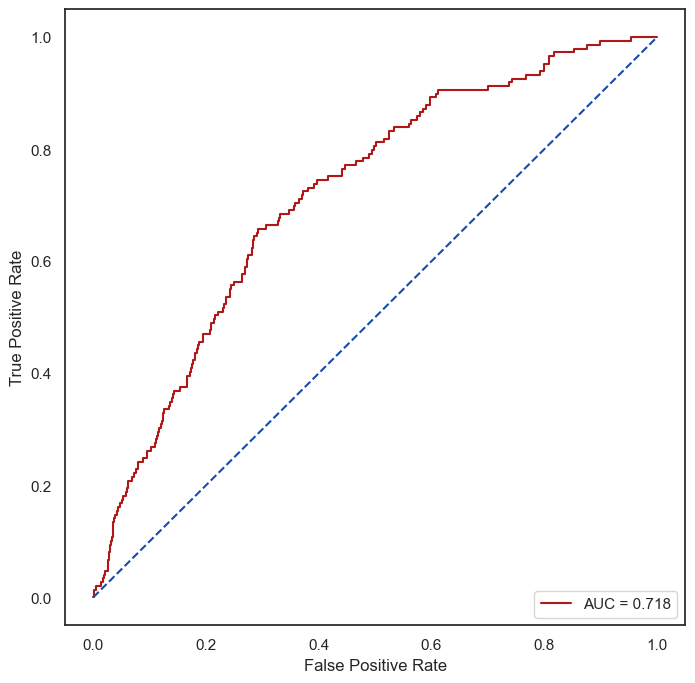

In [65]:
best_params = {'booster': 'gbtree', 'eta': 0.9957423589060678, 'max_depth': 283, 'leaf_size': 0.0004010438482451653, 'reg_lambda': 0.03533431523250564}
classifier = XGBClassifier(**best_params)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_XGB.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_XGB.jpg"))

KNeighborsClassifier

In [ ]:
def objective(trial):

    params = {
            'n_neighbors' : trial.suggest_int('n_neighbors', 2, 7),
            'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
            'algorithm' : trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
            'leaf_size' : trial.suggest_int('leaf_size', 10, 50),
            'p' : trial.suggest_int('p', 1, 3),
    }
    model = KNeighborsClassifier(**params)
    
    model.fit(X_train, y_train)

    y_pred = np.round(model.predict(X_test))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=500)

[I 2023-07-09 12:20:30,685] A new study created in memory with name: no-name-0b5bddff-a24d-46f0-be6b-de1c92af3a3e
[I 2023-07-09 12:20:35,340] Trial 0 finished with value: 0.5070315541834721 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 48, 'p': 1}. Best is trial 0 with value: 0.5070315541834721.
[I 2023-07-09 12:20:39,062] Trial 6 finished with value: 0.5022460767455017 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 47, 'p': 2}. Best is trial 0 with value: 0.5070315541834721.
[I 2023-07-09 12:20:40,408] Trial 7 finished with value: 0.5020700823773214 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 25, 'p': 1}. Best is trial 0 with value: 0.5070315541834721.
[I 2023-07-09 12:20:41,126] Trial 2 finished with value: 0.5061347675940188 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 24, 'p': 1}. Best is trial 0 wi

In [ ]:
parameters = study.best_params
roc = round(study.best_value, 3)
precision = round(study.best_trial.user_attrs['precision'], 3)
recall = round(study.best_trial.user_attrs['recall'], 3)
f1 = round(study.best_trial.user_attrs['f1'], 3)

print(f'\033[1mKNeighborsClassifier Model\033[0m\nBest parameters: {parameters}\nBest ROC AUC score: {roc}\nPrecision score: {precision}\nRecall score: {recall}\nF1 score: {f1}')

KNeighborsClassifier Model
Best parameters: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 30, 'p': 1}
Best ROC AUC score: 0.512
Precision score: 0.045
Recall score: 0.038
F1 score: 0.042


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8385
           1       0.04      0.04      0.04       149

    accuracy                           0.97      8534
   macro avg       0.51      0.51      0.51      8534
weighted avg       0.97      0.97      0.97      8534

ROC AUC score: 0.5312518759529842
Balanced Accuracy Score:  0.5120245084502928


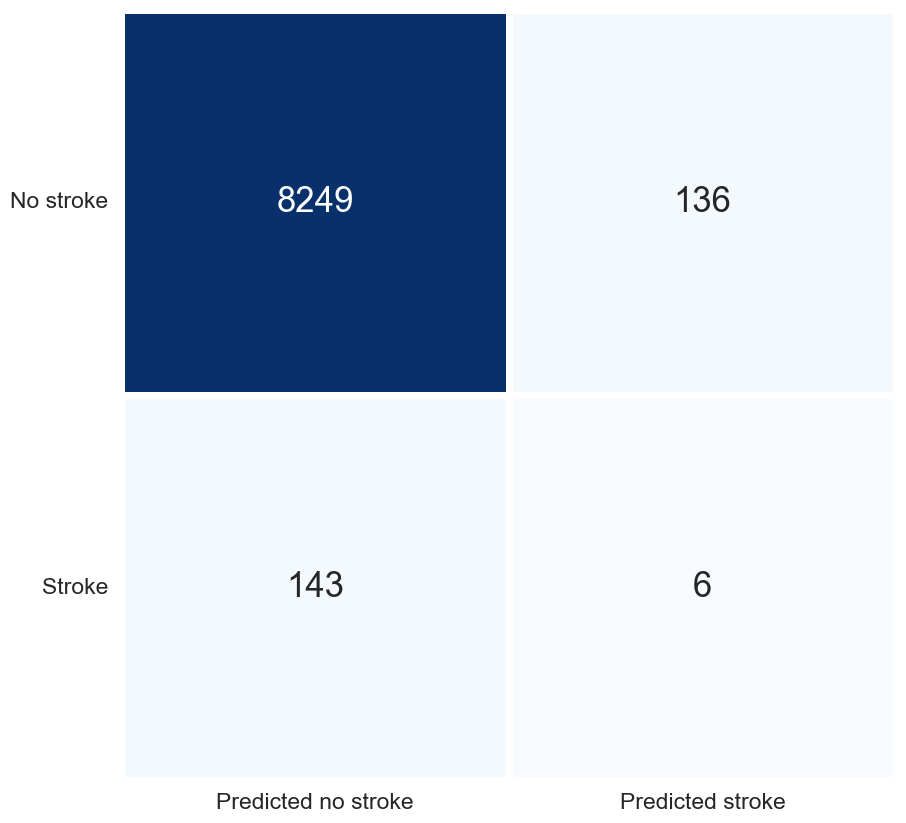

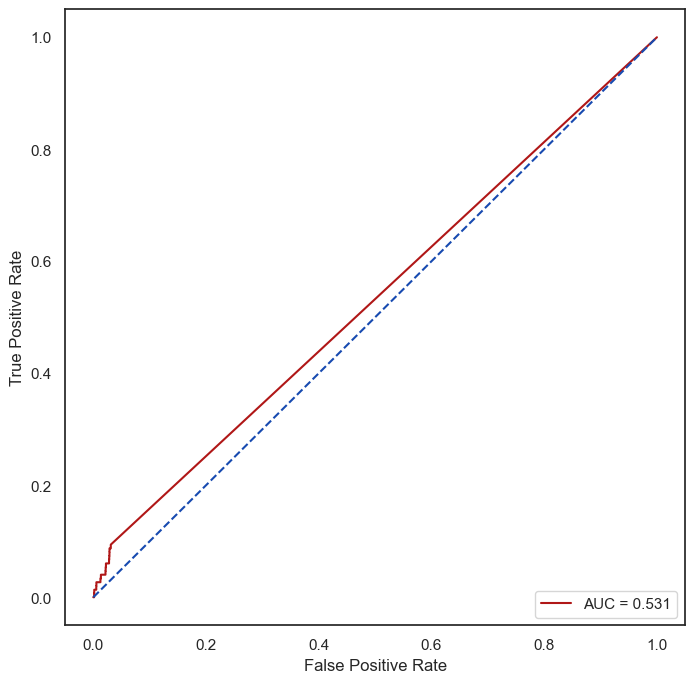

In [60]:
best_params = {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 30, 'p': 1}
classifier = KNeighborsClassifier(**best_params)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_KNN.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_KNN.jpg"))

GaussianNB

In [ ]:
def objective(trial):

    params = {
                'var_smoothing' : 10**trial.suggest_float('var_smoothing', -11, -7)
    }    
    model = GaussianNB(**params)
    
    model.fit(X_train, y_train)

    y_pred = np.round(model.predict(X_test))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc


study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=500)

[I 2023-07-09 12:36:55,252] A new study created in memory with name: no-name-e53a6d69-8bcf-4371-a676-c734b9012122
[I 2023-07-09 12:36:55,526] Trial 4 finished with value: 0.6901322087629502 and parameters: {'var_smoothing': -8.028242070106124}. Best is trial 4 with value: 0.6901322087629502.
[I 2023-07-09 12:36:55,533] Trial 1 finished with value: 0.6794051465087725 and parameters: {'var_smoothing': -9.042636773711072}. Best is trial 4 with value: 0.6901322087629502.
[I 2023-07-09 12:36:55,539] Trial 6 finished with value: 0.6634651385423183 and parameters: {'var_smoothing': -10.212881315464807}. Best is trial 4 with value: 0.6901322087629502.
[I 2023-07-09 12:36:55,540] Trial 3 finished with value: 0.6652669322649616 and parameters: {'var_smoothing': -9.844522085712628}. Best is trial 4 with value: 0.6901322087629502.
[I 2023-07-09 12:36:55,563] Trial 2 finished with value: 0.6783491802996912 and parameters: {'var_smoothing': -9.115209257980032}. Best is trial 4 with value: 0.69013220

In [ ]:
parameters = study.best_params
roc = round(study.best_value, 3)
precision = round(study.best_trial.user_attrs['precision'], 3)
recall = round(study.best_trial.user_attrs['recall'], 3)
f1 = round(study.best_trial.user_attrs['f1'], 3)

print(f'\033[1mGaussianNB Model\033[0m\nBest parameters: {parameters}\nBest ROC AUC score: {roc}\nPrecision score: {precision}\nRecall score: {recall}\nF1 score: {f1}')

GaussianNB Model
Best parameters: {'var_smoothing': -7.000577727631357}
Best ROC AUC score: 0.714
Precision score: 0.033
Recall score: 0.943
F1 score: 0.063


              precision    recall  f1-score   support

           0       1.00      0.48      0.65      8385
           1       0.03      0.91      0.06       149

    accuracy                           0.48      8534
   macro avg       0.51      0.69      0.35      8534
weighted avg       0.98      0.48      0.64      8534

ROC AUC score: 0.7889936087532466
Balanced Accuracy Score:  0.6916009332741033


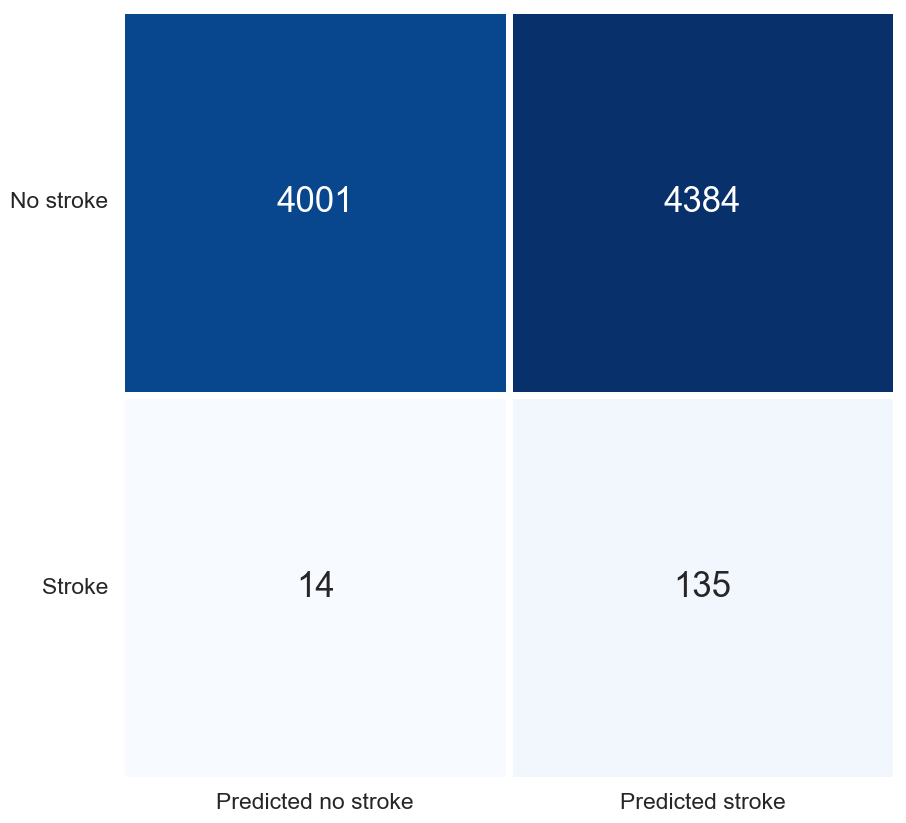

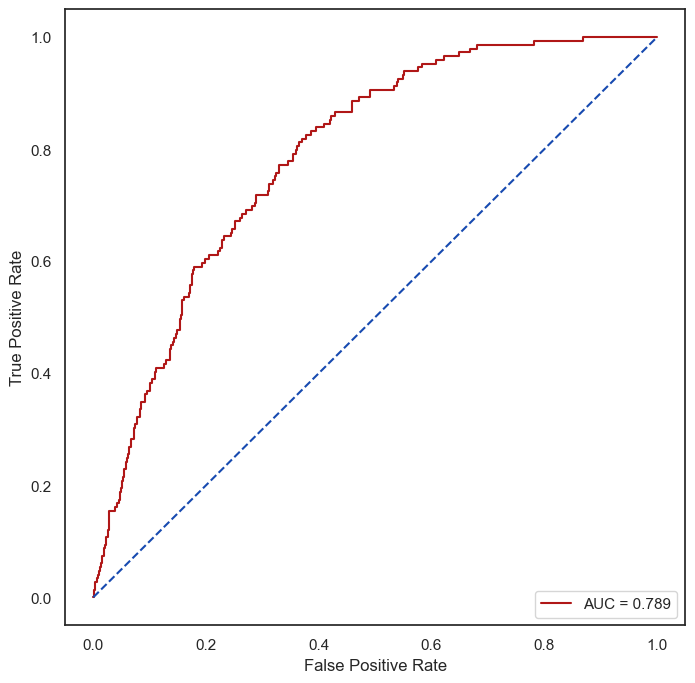

In [61]:
classifier = GaussianNB(var_smoothing=10**(-7.000577727631357))
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_GNB.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_GNB.jpg"))

DecisionTreeClassifier

In [ ]:
def objective(trial):

    params = {
            'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            'max_depth' : trial.suggest_int('max_depth', 2, 50),
            'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 5, 100),
            'max_features' : trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
    }
    model = DecisionTreeClassifier(**params)
    
    model.fit(X_train, y_train)

    y_pred = np.round(model.predict(X_test))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=500)

[I 2023-07-30 22:29:53,946] A new study created in memory with name: no-name-0152fb7c-0ae6-4d8d-93e2-43ac208cd059
[I 2023-07-30 22:29:54,604] Trial 3 finished with value: 0.5 and parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 51, 'max_features': 'auto'}. Best is trial 3 with value: 0.5.
[I 2023-07-30 22:29:54,816] Trial 2 finished with value: 0.5 and parameters: {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 46, 'max_features': 'log2'}. Best is trial 3 with value: 0.5.
[I 2023-07-30 22:29:54,865] Trial 0 finished with value: 0.5 and parameters: {'criterion': 'log_loss', 'max_depth': 11, 'min_samples_leaf': 74, 'max_features': 'log2'}. Best is trial 3 with value: 0.5.
[I 2023-07-30 22:29:54,916] Trial 6 finished with value: 0.5 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 89, 'max_features': 'auto'}. Best is trial 3 with value: 0.5.
[I 2023-07-30 22:29:54,966] Trial 7 finished with value: 0.5 and parameters: {'criterion

In [ ]:
parameters = study.best_params
roc = round(study.best_value, 3)
precision = round(study.best_trial.user_attrs['precision'], 3)
recall = round(study.best_trial.user_attrs['recall'], 3)
f1 = round(study.best_trial.user_attrs['f1'], 3)

print(f'\033[1mDecisionTreeClassifier Model\033[0m\nBest parameters: {parameters}\nBest ROC AUC score: {roc}\nPrecision score: {precision}\nRecall score: {recall}\nF1 score: {f1}')

DecisionTreeClassifier Model
Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 51, 'max_features': 'auto'}
Best ROC AUC score: 0.5
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8385
           1       0.00      0.00      0.00       149

    accuracy                           0.98      8534
   macro avg       0.49      0.50      0.50      8534
weighted avg       0.97      0.98      0.97      8534

ROC AUC score: 0.7137393796048392
Balanced Accuracy Score:  0.5


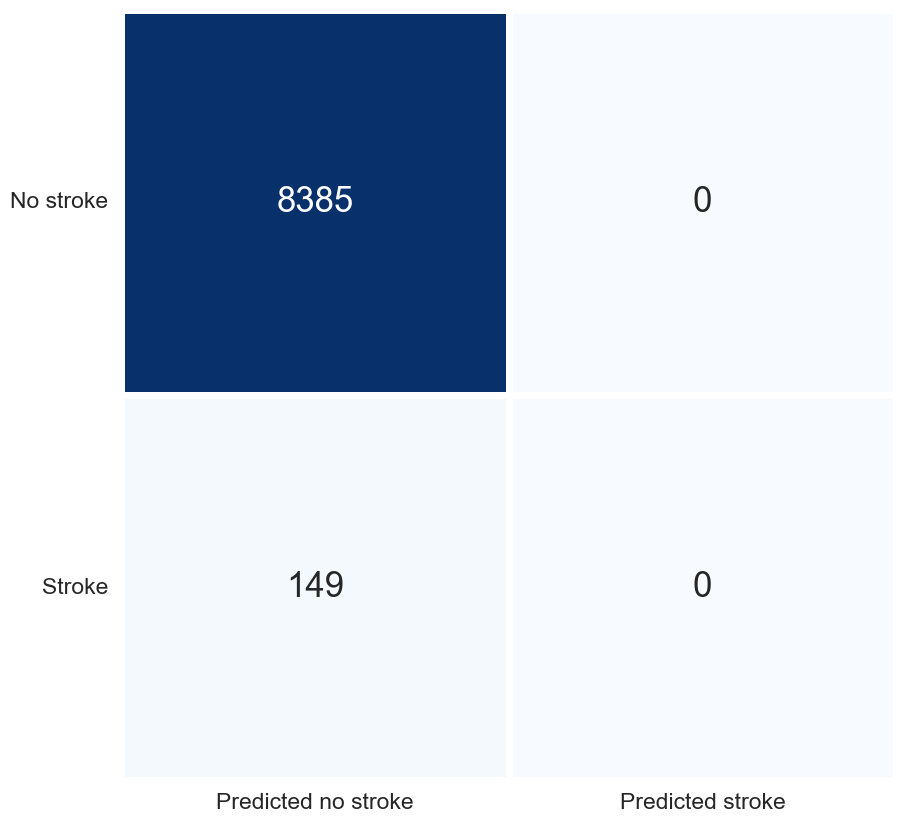

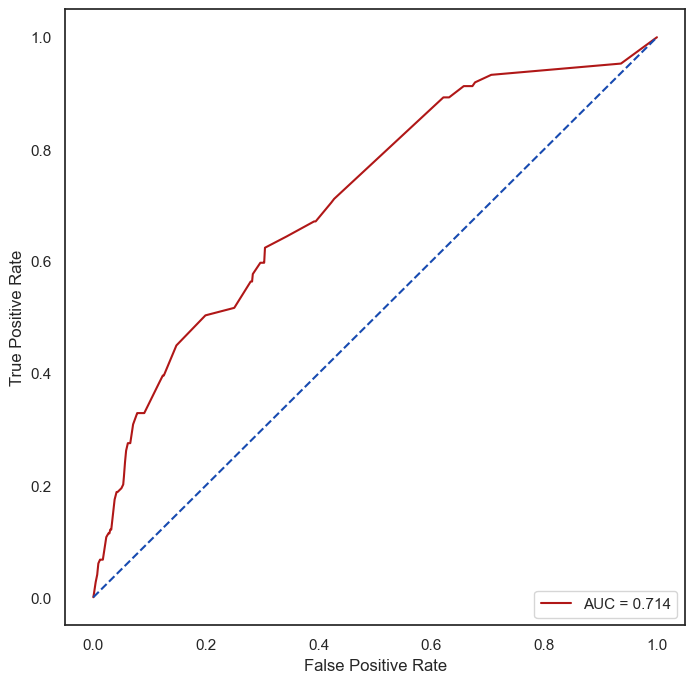

In [62]:
best_params = {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 51, 'max_features': 'auto'}
classifier = DecisionTreeClassifier(**best_params)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_DTC.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_DTC.jpg"))

Modelos agrupados

In [ ]:
def objective(trial):

    classifier_name = trial.suggest_categorical("model", ['KNeigbors', 'GaussianNB', 'DecisionTree', 'XGBoost'])
   
    if classifier_name == 'KNeigbors':
        params = {
                'n_neighbors' : trial.suggest_int('n_neighbors', 2, 7),
                'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
                'algorithm' : trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
                'leaf_size' : trial.suggest_int('leaf_size', 10, 50),
                'p' : trial.suggest_int('p', 1, 3),
        }
        model = KNeighborsClassifier(**params)
   
    elif classifier_name == 'GaussianNB':
        params = {
                'var_smoothing' : 10**trial.suggest_float('var_smoothing', -11, -7)
        }
        model = GaussianNB(**params)
   
    elif classifier_name == 'DecisionTree':
        params = {
                'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
                'max_depth' : trial.suggest_int('max_depth', 2, 50),
                'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 5, 100),
                'max_features' : trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        }
        model = DecisionTreeClassifier(**params)
    
    else:
        params = {
        'booster' : trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'eta' : trial.suggest_float('eta', 0, 1),
        'max_depth' : trial.suggest_int('max_depth', 1, 300),
        'alpha' : trial.suggest_float('leaf_size', 0, 0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 0.1),
        }
        model = XGBClassifier(**params)
        
   
   
    model.fit(X_train, y_train)

    y_pred = np.round(model.predict(X_test))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=2000)

In [ ]:
parameters = study.best_params
roc = round(study.best_value, 3)
precision = round(study.best_trial.user_attrs['precision'], 3)
recall = round(study.best_trial.user_attrs['recall'], 3)
f1 = round(study.best_trial.user_attrs['f1'], 3)

print(f'Best parameters: {parameters}\nBest ROC AUC score: {roc}\nPrecision score: {precision}\nRecall score: {recall}\nF1 score: {f1}')

### Guardamos modelo escogido

In [23]:
best_model = GaussianNB(var_smoothing=10**(-7.000577727631357))
best_model.fit(X, y)

GaussianNB(var_smoothing=9.986706173812031e-08)

In [24]:
name = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'model', 'modelo')
with open(name, 'wb') as file:  
    pickle.dump(best_model, file)

In [25]:
with open(name, 'rb') as file:  
    model = pickle.load(file)

In [26]:
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
auc

0.703456956133716